In [ ]:
based on: https://www.datacamp.com/community/tutorials/social-network-analysis-python

##Social Network Analysis

Let us first start with what do we mean by Social Networks. Below you see a network of actors, depicted as "nodes" or dots. They are connected with solid lines if they have worked together in at least one movie. We are using actors in movies, but you could, of course, identify social networks in a host of other areas. For example, scientists who have co-authors papers together or cited each other, friends who follow each other on Twitter, or people who have worked together on projects within their company.  You can also use similar network analysis techniques in Python to analyses products that are typically bought together by coustomers.

-- insert image of actors graph

The relationship among people is interesting.  Analyzing these networks can further give us great insights about the people in the network; such as, who are most influential, who connects one person to another person, who are most connected, where to people cluster together, etc.  There is lots you can do with social network analysis, and in this tutorial you will the basics to get you started.

Two core concepts to, or components of, social network analysis are:

Nodes: The individuals whose network we are building. Actors in our first example.

Edges: The connection between the nodes (people). It represents a relationship between the nodes of the network. In our example, the relationship was that the actors have worked together.

We use social network analysis to understand the characteristics of nodes (people) and edges (their relationships).

Let's get started.

We will use to libraries in Python to get begin.  networkX is a library for doing social network analysis, and matplotlib is a library that has tools we will use to viualize the network.



In [1]:
import networkx as nx
import matplotlib.pyplot as plt

###Symetric Network 

We will be begin by creating a symmetric network where the relationship "working together in a movie" is a symmetric relationship. If A is related to B, B is also related to A.  

We will be using the Graph() method to create a new network and add_edge() to add an edge between two nodes.

We create the nodes (e.g., 'Actor A') and put them together create edges. In this example, Actor A has been in a movie with Actor D as indicated by the second edge.

In [2]:

G_symmetric = nx.Graph()
G_symmetric.add_edge('Actor A','Actor C')
G_symmetric.add_edge('Actor A','Actor D')
G_symmetric.add_edge('Actor A','Actor E')
G_symmetric.add_edge('Actor A','Actor B')
G_symmetric.add_edge('Actor C','Actor D')
G_symmetric.add_edge('Actor C','Actor E')
G_symmetric.add_edge('Actor C','Actor B')
G_symmetric.add_edge('Actor B','Actor D')

Now with our graph created, we can view the graph using the networkx function: nx.draw_networkx()

/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


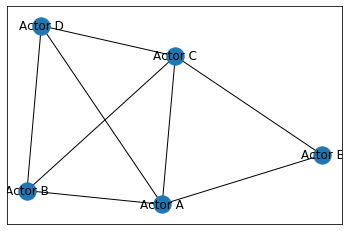

In [3]:
nx.draw_networkx(G_symmetric)

###Asymetric Network 

What if the relationship between nodes is directional however?  Let's say, rather than acting together in a movie, we want to know which actors have watched a movie starring the other actor. In this case, Actor A may have seen Actor D's latest movie, but Actor D has not seen Actor A's latest movie.

In this case, we would call Actor B the 'child of' Actor A, and the relationship is no longer symmetric. If A is the child of B, then B is not a child of A. Such a network where the relationship is asymmetric (A is related to B, does not necessarily means that B is associated with A) is called an Asymmetric network. 

We can build the asymmetric network in NetworkX using the DiGraph fuction, which is short of Directional Graph. Let us make an asymmetric graph.

In [4]:
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('Actor A','Actor C')
G_asymmetric.add_edge('Actor A','Actor D')
G_asymmetric.add_edge('Actor B','Actor E')
G_asymmetric.add_edge('Actor A','Actor B')

/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


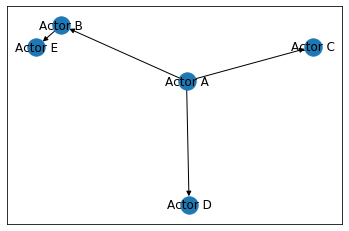

In [5]:
nx.draw_networkx(G_asymmetric)

Many times the nodes do not separate out far enough to be distinctly visible in the network drawn. To take care of this, we can use the function to force a layout, which positions the nodes in a manner that we can distinctly see them. We can accomplish this using spring_layout() function, followed by the draw_networkx() function.

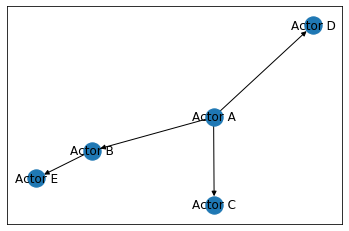

In [6]:
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric)

Go back to try changing our network (for instance, making Actor Actor D a 'child' of Actor E). Run the graphs again to see what happens.

###Weighted Networks

Actors star in many movies however, and they often start in several movies together. For example, we can add to our  initial network the number of movies done together as a weight, we will get a Weighted Network. Let us make a network  again with our actors, but this time we add weight to the network, each edge has a weight signifying the number of movies they have done together.



In [32]:
G_weighted = nx.Graph()
G_weighted.add_edge('Actor A','Actor C', weight=5)
G_weighted.add_edge('Actor A','Actor D', weight=8)
G_weighted.add_edge('Actor A','Actor E', weight=1)
G_weighted.add_edge('Actor A','Actor B', weight=1)
G_weighted.add_edge('Actor C','Actor D', weight=.4)
G_weighted.add_edge('Actor C','Actor E', weight=7)
G_weighted.add_edge('Actor C','Actor B', weight=1)
G_weighted.add_edge('Actor B','Actor D', weight=3)

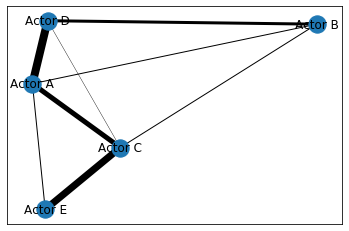

In [45]:
nx.circular_layout(G_weighted)
edges = G_weighted.edges()
weights = [G_weighted[u][v]['weight'] for u,v in edges]
nx.draw_networkx(G_weighted, width=weights)

In this case, the  edge width specifies the weight between two nodes. The more movies done together, the wider the edge. We also added a circular_layout() to the code in order to spread the actors out. 

Try changing the weights to see how that changes the visual graph.

###Degree

At times, you may want to know the degree to which one famous actor, in our examples, is connected to other famous actors.  Degree of a node defines the number of connections a node has. NetworkX has the function degree which we can use to determine the degree of a node in the network.

Try it first the symetric graph you created above.  Then try the asymetric graph.

In [59]:
nx.degree(G_symmetric, 'Actor A')

4

###Clustering Coefficient

It is observed that people who share connections in a social network tend to form associations. As they say, "birds of a feather flock together". Similarly, famous actors tend to star in movies together. If they like working together, and the movies are successful, then they will continue to make more movies together. 

In other words, there is a tendency in a social network to form clusters. We can determine the clusters of a node, Local Clustering Coefficient, which is the fraction of pairs of the node's friends (that is connections) that are connected with each other (i.e., how many of your friends are also friends with each other). To determine the local clustering coefficient, we make use of nx.clustering(Graph, Node) function.

In the symmetric Actor-network, you will find that Actor B has a local clustering coefficient of 1 and Actor C has a local clustering coefficient of 0.67.

The average clustering coefficient (sum of all the local clustering coefficients divided by the number of nodes) for the symmetric Actor-network is 0.867. We can obtain it using:

In [62]:
nx.clustering(G_symmetric, 'Actor A')



0.6666666666666666

In [61]:
nx.average_clustering(G_symmetric)

0.8666666666666666

###Distance

As networks grow, we often want to know the distance (or length of path) between nodes (people).  For instance, if Actor B has worked with Actors A, C, and D (but not with Actor E), then what is the shorest path in their network for connecting with Actor E.  Or, Brad Pitt has worked with many other famous actors, but has not worked with Lady Gaga. But he wants to work with her, which of his other famous friends should he call in order to get in touch with her? 

We can also determine the shortest path between two nodes and its length in NetworkX using nx.shortest_path(Graph, Node1, Node2) and nx.shortest_path_length(Graph, Node1, Node2) functions respectively.

In [63]:
nx.shortest_path(G_weighted, 'Actor B', 'Actor E')
nx.shortest_path_length(G_weighted, 'Actor B', 'Actor E')

2

###Network Tree

We can find the distance of a node from every other node in the network using breadth-first search algorithm, starting from that node. In other words, if we want to see how everyone is connected to Actor E, this will show use the paths. networkX provides the function called bfs_tree to do this, in this example starting from Actor E.

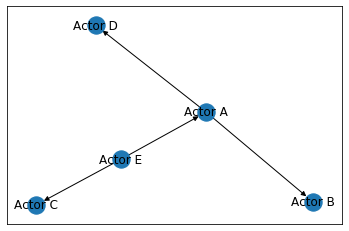

In [64]:
T = nx.bfs_tree(G_weighted, 'Actor E')
nx.draw_networkx(T)

Try drawing the trees for Actors C and D.  Then try using spring and circular layouts.

###Network Influencers
Above we learned some of the network distance measures, they are useful in knowing how the information will spread through the network. But all nodes (people) are not the same, so how do we find the most important nodes (individuals) in the network. These parameters are known as Centrality Measures. Centrality Measures can help us in identifying popularity, most liked, and biggest influencers within the network.

###Degree Centrality
The people most popular or more liked usually are the ones who have more friends. Degree centrality is a measure of the number of connections a particular node has in the network. It is based on the fact that important nodes have many connections. 

NetworkX has the function degree_centrality() to calculate the degree centrality of all the nodes of a network.


In [65]:
nx.degree_centrality(G_weighted)

{'Actor A': 1.0,
 'Actor C': 1.0,
 'Actor D': 0.75,
 'Actor E': 0.5,
 'Actor B': 0.75}

###Eigenvector Centrality
It is not just how many individuals one is connected too, but the type of people one is connected with that can decide the importance of a node. For instance, if you are connected to Matt Damon (who has been been in lots of movies with other famous actors) that is of more value than being connected with Actor E who has only been in one movie with another famous actor.

Eigenvector centrality is a measure of exactly this. It decides that a node is important if it is connected to other important nodes. 

In [66]:
nx.eigenvector_centrality(G_weighted)

{'Actor A': 0.5100364187624349,
 'Actor C': 0.5100364187624349,
 'Actor D': 0.43904190094642953,
 'Actor E': 0.3069366734339046,
 'Actor B': 0.43904190094642953}

###Betweenness Centrality
The Betweenness Centrality is the centrality of control. It represents the frequency at which a point occurs on the shortest paths that connected a pair of points. It quantifies how many times a particular node comes in the shortest chosen path between two other nodes. The nodes with high betweenness centrality play a significant role in the communication/information flow within the network. The nodes with high betweenness centrality can have a strategic control and influence on others. An individual at such a strategic position can influence the whole group, by either withholding or coloring the information in transmission.

Back to our example, Matt Damon has a high betweenness centrality because he is the shortest path for many other actors to reach another actor they want to work with.  If Brad Pitt wants to be in a movie with Lady Gaga, his shortest path may be through Matt Damon.  And several other actors are in the same situation, so this gives Matt a great deal of "control" over who gets to work with Lady Gaga. 

Networkx has the function betweenness_centrality() to measure it for the network. 

It has options to select if we want betweenness values to be normalized or not, weights to be included in centrality calculation or not, and to include the endpoints in the shortest path counts or not.

In [67]:
nx.betweenness_centrality(G_weighted)

{'Actor A': 0.16666666666666666,
 'Actor C': 0.16666666666666666,
 'Actor D': 0.0,
 'Actor E': 0.0,
 'Actor B': 0.0}

In [ ]:
nx.betweenness_centrality(G_weighted, , , ,)


Now that we have some social network analysis tools, let's apply them to a larger data set.

Let us start with a Facebook data set, it contains the aggregated network of ten individuals’ Facebook friends list. The data set is already in the Jupyter Notebooks folder, but you can download the required facebook_combined.txt file from the Stanford University https://snap.stanford.edu/data/egonets-Facebook.htmlsite if you want to play with it more outside of this Notebook.

We start by reading the file and construct the Graph.

In [2]:
G_fb = nx.read_edgelist("./facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

Let's get an overview of what we have in the network.

In [3]:
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


Wow, the network consists of 4,039 nodes, connected via 88,234 edges! Yep, it is a big network. Let's see a visual graph of it. You write the code this time. With 88k edges it will take a little while to graph, so be a little patient.

/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


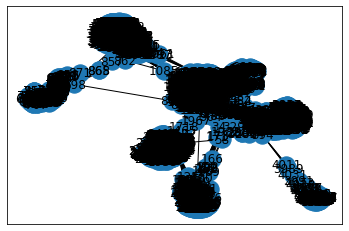

In [4]:
nx.draw_networkx(G_fb)

Does your graph look somewhat like this:


If not, try a few more times.  If you still struggle, highlight the area below with your mouse to see the code

<style "color: white;"><br>
nx.spring_layout(G_fb)<br>
nx.draw_networkx(G_fb)<br></style>



We can also visualize the network such that the node color varies with Degree and node size with Betweenness Centrality. 

In [6]:
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

KeyboardInterrupt: 

Can you figure out what each line of code above is doing?

After you have tried (and maybe done a few internet searches) you can highlight the area below to learn more:
    
    
<style "color: white;"><br>
pos = nx.spring_layout(G_fb)   ##create the spread out graph of the Fb data
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)  ## 
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')



</style>





You can also know the labels of the nodes with the highest betweenness centrality using:

In [5]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

NameError: name 'betCent' is not defined

We can see that some nodes are common between Degree Centrality, which is a measure of degree, and Betweenness Centrality which controls the information flow. It is natural that nodes that are more connected also lie on shortest paths between other nodes. The node 1912 is an important node as it is crucial according to all three centrality measures that we had considered.